# 16. NeuralProphet
Neural Prophet is a time series forecasting tool that is designed as an extension to the popular Prophet package. By incorporating neural network components into the Prophet model, Neural Prophet aims to provide more flexibility and improved forecasting performance. Here are some of the notable capabilities of Neural Prophet:

1. **Trend Forecasting**: Like Prophet, Neural Prophet can capture the underlying trend in the data, whether it's linear or logistic.

2. **Seasonality**: Neural Prophet models yearly, weekly, and daily seasonality and can also handle custom seasonalities.

3. **Holidays and Special Events**: You can specify known events (e.g., holidays) that might affect your forecast.

4. **Autoregressive Components**: Neural Prophet can use lagged values of the time series (AR terms) to improve predictions.

5. **Neural Network Components**: The model utilizes a feed-forward neural network architecture which allows it to capture complex patterns in the data.

6. **Missing Data Handling**: Neural Prophet can handle missing data points without the need for manual imputation.

7. **Changepoints**: Just like in Prophet, you can specify changepoints or let the model detect them automatically. These are points where the trend changes its trajectory.

8. **Regularization**: The model supports regularization techniques to prevent overfitting.

9. **Configurable Model Components**: Users can customize which components (trend, seasonality, holidays, etc.) to include in the model.

10. **Uncertainty Intervals**: Neural Prophet provides uncertainty intervals for its forecasts.

11. **Model Interpretability**: The model provides components' plots, similar to Prophet, which allow users to visualize the trend, seasonality, and holiday effects.

12. **Diagnostics**: Neural Prophet provides tools to diagnose the performance of the model, such as plotting the forecast, residuals, and more.

13. **Integration with other tools**: Neural Prophet provides utilities to convert its models to and from other popular forecasting libraries.

14. **Scalability**: The package is designed to be scalable and efficient.

15. **Multivariate Forecasting**: At the time of my last update, Neural Prophet was working towards supporting multivariate time series forecasting.

16. **Hyperparameter Tuning**: Neural Prophet integrates with tools like Optuna to allow for efficient hyperparameter tuning.


## 16.1 Installation
To begin using NeuralProphet, you'll need to install it. You can do this using pip:

In [ ]:
!pip install neuralprophet


If you plan to use NeuralProphet in Google Colab, please use the following commands to avoid conflicts with pre-installed packages in Colab:

In [ ]:
if "google.colab" in str(get_ipython()):
    # uninstall preinstalled packages from Colab to avoid conflicts
    !pip uninstall -y torch notebook notebook_shim tensorflow tensorflow-datasets prophet torchaudio torchdata torchtext torchvision
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes

import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

set_log_level("ERROR")

if you have conflict issue run below cell

In [ ]:
!pip uninstall fastai

In [ ]:
!pip install git+https://github.com/ourownstory/neural_prophet.git

## 16.2 Basic Usage



### 16.2.1 Importing Libraries
First, you'll need to import the necessary libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from neuralprophet import NeuralProphet


### 16.2.2 Generating Synthetic Data
We'll create synthetic data that incorporates daily, weekly, monthly, quarterly, and yearly seasonality, as well as a trend and a change point.


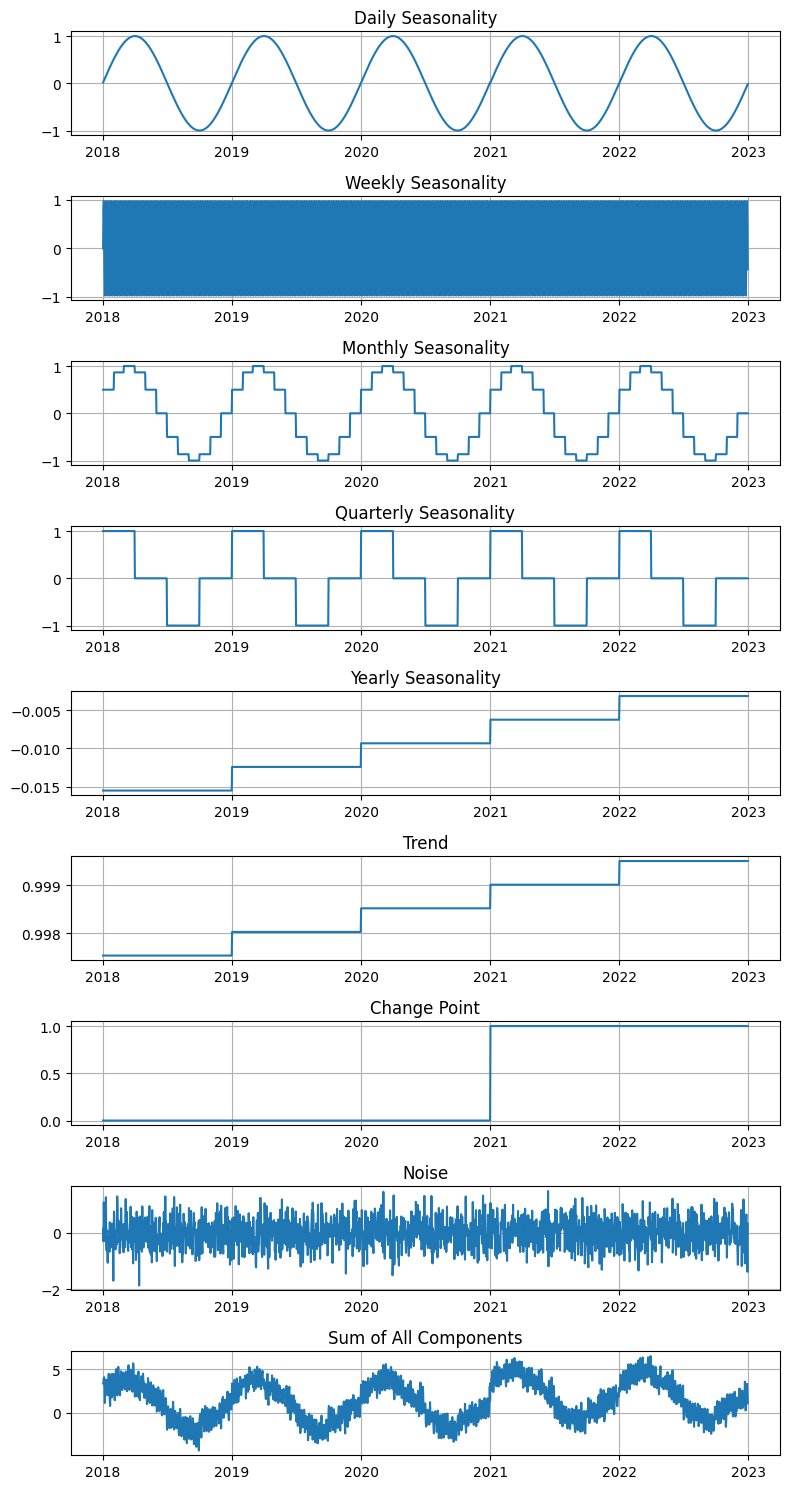

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Creating the synthetic data as per the provided snippet
np.random.seed(0)
n = 365 * 5
dates = pd.date_range(start="1/1/2018", periods=n, freq="D")
y = (
    np.sin(dates.dayofyear / 365 * 2 * np.pi) +
    np.sin(dates.weekday / 7 * 2 * np.pi) +
    np.sin(dates.month / 12 * 2 * np.pi) +
    np.sin(dates.quarter / 4 * 2 * np.pi) +
    np.sin(dates.year / 2023 * 2 * np.pi) +
    dates.year / 2023 +
    np.where(dates.year > 2020, 1, 0) +
    np.random.normal(scale=0.5, size=n)
)
data = pd.DataFrame({'ds': dates, 'y': y})

# Separating the components for plotting
components = {
    "Daily Seasonality": np.sin(dates.dayofyear / 365 * 2 * np.pi),
    "Weekly Seasonality": np.sin(dates.weekday / 7 * 2 * np.pi),
    "Monthly Seasonality": np.sin(dates.month / 12 * 2 * np.pi),
    "Quarterly Seasonality": np.sin(dates.quarter / 4 * 2 * np.pi),
    "Yearly Seasonality": np.sin(dates.year / 2023 * 2 * np.pi),
    "Trend": dates.year / 2023,
    "Change Point": np.where(dates.year > 2020, 1, 0),
    "Noise": np.random.normal(scale=0.5, size=n)
}
# Generate noise once to keep it consistent
noise = np.random.normal(scale=0.5, size=n)

# Update the 'Noise' component with the pre-generated noise
components['Noise'] = noise
# Plotting
fig, axs = plt.subplots(len(components) + 1, 1, figsize=(8, 15))  # Adjust the figure size

# Plot each component in a subplot
for i, (label, component) in enumerate(components.items()):
    axs[i].plot(dates, component)
    axs[i].set_title(label)
    axs[i].grid(True)  # Add grid

# Plot the sum of all components
axs[-1].plot(dates, y, label='Sum of Components')
axs[-1].set_title('Sum of All Components')
axs[-1].grid(True)  # Add grid

plt.tight_layout()
plt.show()


### 16.2.3 Model Training
We’ll utilize NeuralProphet to model the synthetic data. It’s crucial to specify the correct seasonalities and other model components for an accurate fit.

In [ ]:
# Initialize and fit the NeuralProphet model
model = NeuralProphet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    seasonality_mode='additive',
    changepoints_range=0.9,
    n_changepoints=1
)

# Fit the model
metrics = model.fit(data, freq='D')


In [ ]:
model.set_plotting_backend("plotly-static")

### 16.2.4 Forecasting

Predicting: 58it [00:00, ?it/s]

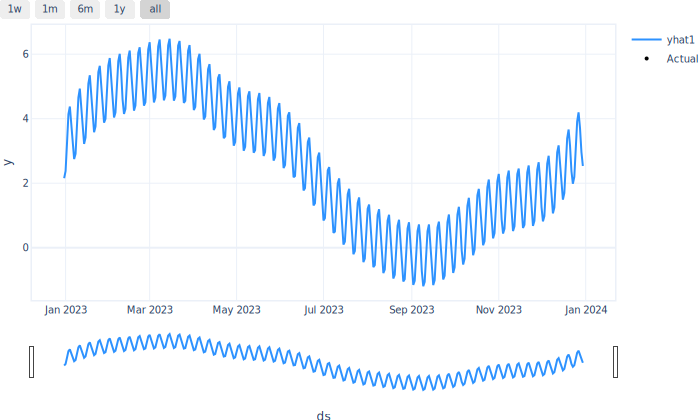

In [ ]:
future = model.make_future_dataframe(data, periods=365)  # predicting 1 year into the future
forecast = model.predict(future)
model.plot(forecast)

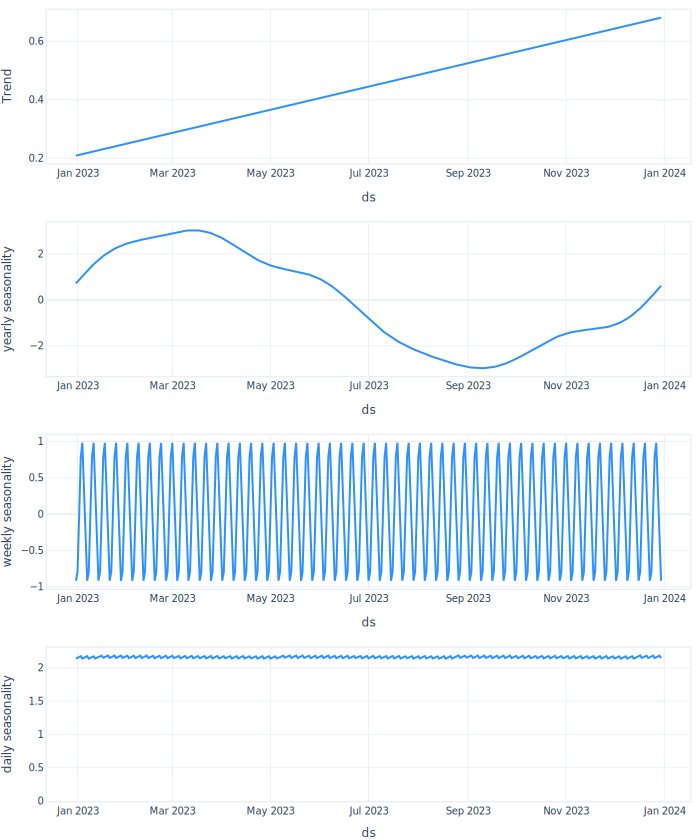

In [ ]:
model.plot_components(forecast)

In [ ]:
forecast.head()

ds     y     yhat1     trend  season_yearly  season_weekly  \
0 2022-12-31  None  2.155269  0.208777       0.724550      -0.916695   
1 2023-01-01  None  2.376627  0.210075       0.805269      -0.792410   
2 2023-01-02  None  3.239869  0.211372       0.885376      -0.019778   
3 2023-01-03  None  4.141049  0.212669       0.964882       0.788777   
4 2023-01-04  None  4.377048  0.213967       1.043561       0.981072   

   season_daily  
0      2.138636  
1      2.153694  
2      2.162899  
3      2.174720  
4      2.138448

### 16.2.5 Manualy Visualization of Forecast

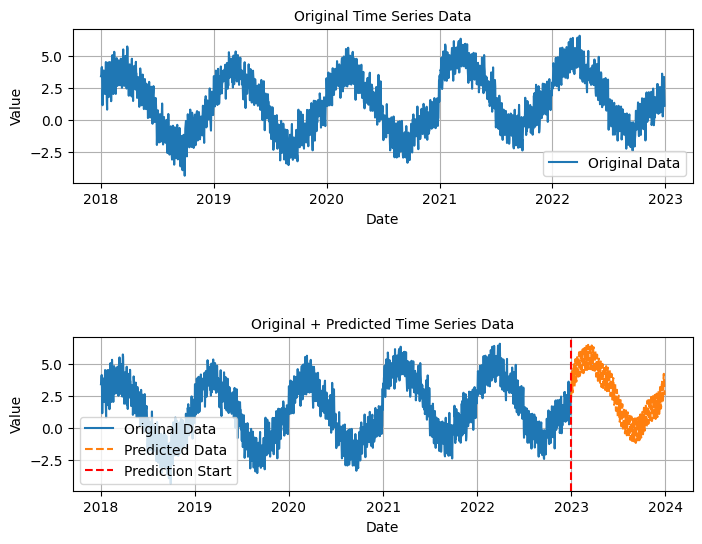

In [ ]:
import matplotlib.pyplot as plt

# Assuming data and forecast dataframes are already defined
fig, ax = plt.subplots(2, 1, figsize=(8, 6))  # Adjust the figure size

# Define a common font size
font_size = 10

# Plot 1: Original Data
ax[0].plot(data['ds'], data['y'], label='Original Data')
ax[0].set_title('Original Time Series Data', fontsize=font_size)
ax[0].set_xlabel('Date', fontsize=font_size)
ax[0].set_ylabel('Value', fontsize=font_size)
ax[0].legend(fontsize=font_size)
ax[0].grid(True)  # Add grid

# Plot 2: Original Data + Predicted Data
ax[1].plot(data['ds'], data['y'], label='Original Data')
ax[1].plot(forecast['ds'], forecast['yhat1'], label='Predicted Data', linestyle='dashed')
ax[1].axvline(x=data['ds'].iloc[-1], color='r', linestyle='--', label='Prediction Start')
ax[1].set_title('Original + Predicted Time Series Data', fontsize=font_size)
ax[1].set_xlabel('Date', fontsize=font_size)
ax[1].set_ylabel('Value', fontsize=font_size)
ax[1].legend(fontsize=font_size)
ax[1].grid(True)  # Add grid

# Adjust the space between the plots
plt.subplots_adjust(hspace=1)

plt.show()


### 16.2.6 Visualizing Components
To evaluate the model's capability in capturing the underlying patterns (like seasonality and trends), utilize the `plot_parameters` method.

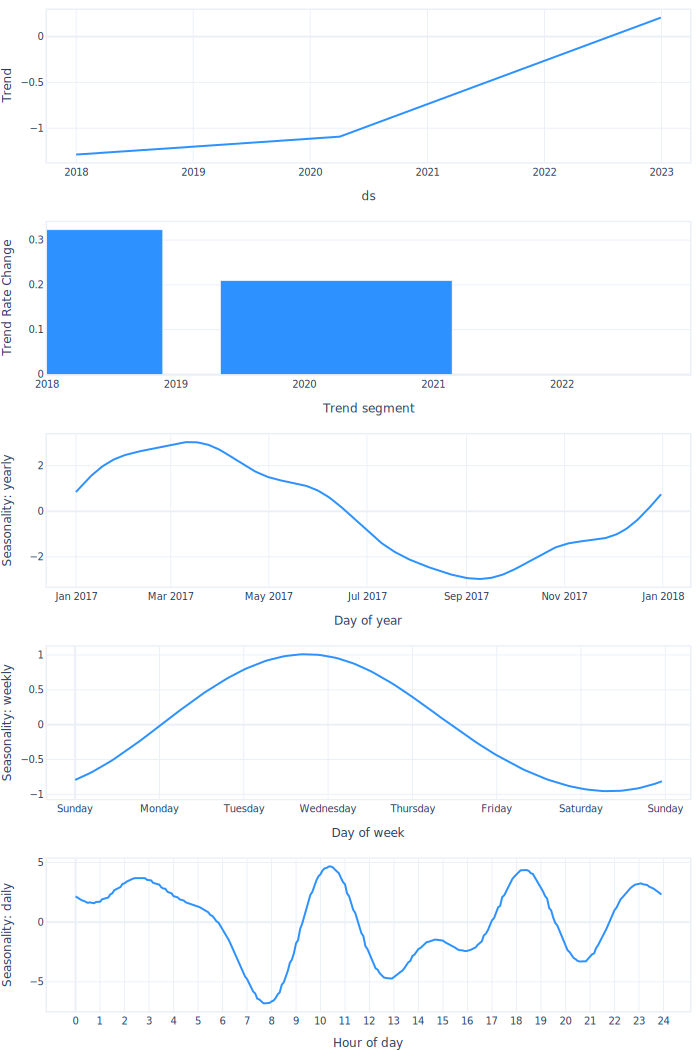

In [ ]:
fig_param = model.plot_parameters()

plot manually using Matplotlib

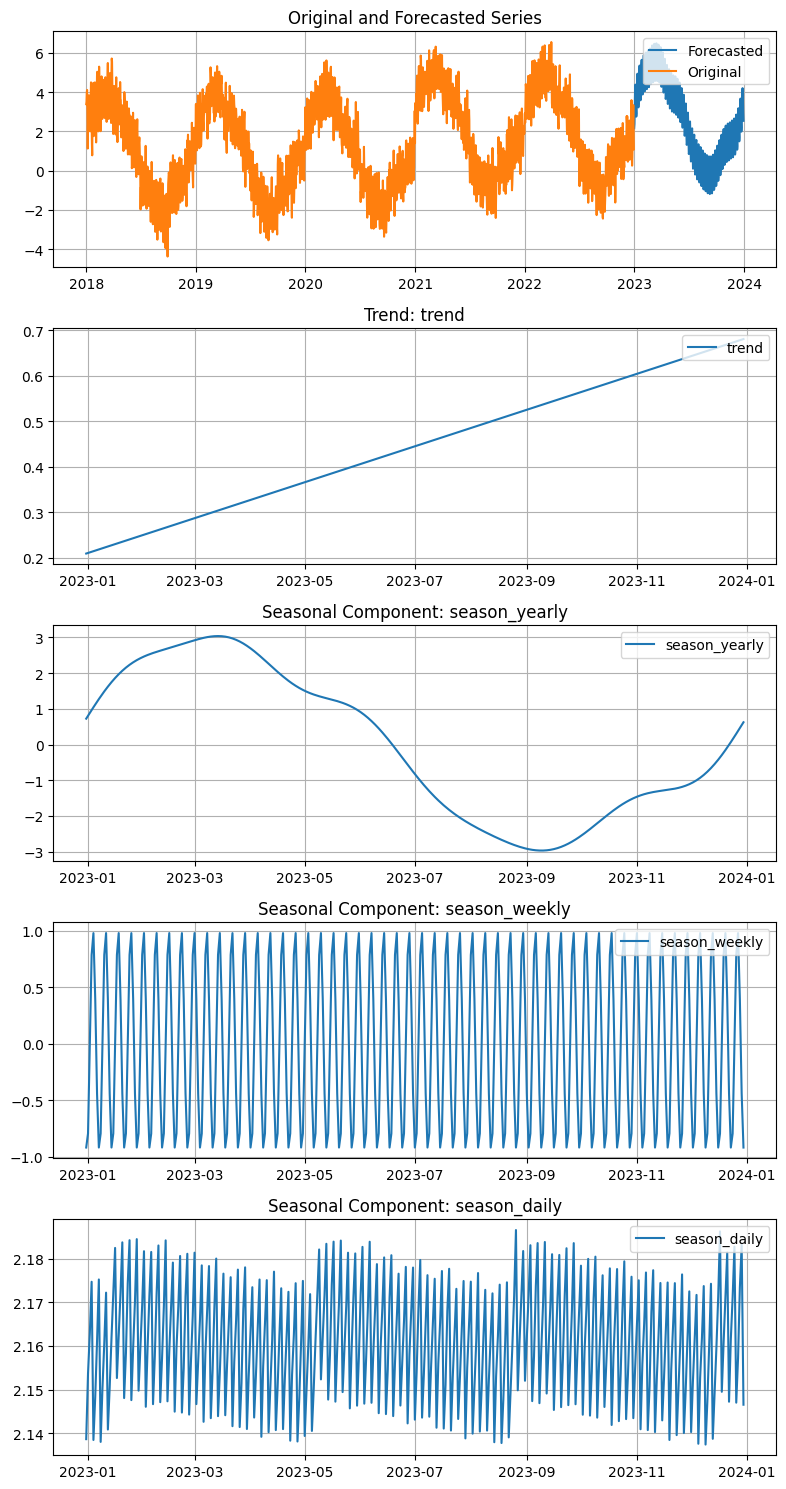

In [ ]:
import matplotlib.pyplot as plt

# Ensure you've created the 'forecast' dataframe already
# forecast = model.predict(future)

# Extract the column names related to the seasonal components and the trend
seasonal_components = [col for col in forecast.columns if 'season' in col]
trend = [col for col in forecast.columns if 'trend' in col]

# Plot the forecast and components
fig, axs = plt.subplots(len(seasonal_components) + len(trend) + 1, 1, figsize=(8, 15))

# Plot the original and forecasted series
axs[0].plot(forecast['ds'], forecast['yhat1'], label='Forecasted')
axs[0].plot(data['ds'], data['y'], label='Original')
axs[0].legend(loc='upper right')
axs[0].set_title('Original and Forecasted Series')
axs[0].grid(True)

# Plot the trend
for i, t in enumerate(trend):
    axs[i+1].plot(forecast['ds'], forecast[t], label=t)
    axs[i+1].legend(loc='upper right')
    axs[i+1].set_title(f'Trend: {t}')
    axs[i+1].grid(True)

# Plot the seasonal components
for i, season in enumerate(seasonal_components, start=i+2):
    axs[i].plot(forecast['ds'], forecast[season], label=season)
    axs[i].legend(loc='upper right')
    axs[i].set_title(f'Seasonal Component: {season}')
    axs[i].grid(True)

plt.tight_layout()
plt.show()


### 16.2.7 Visualizing change points
Visualizing change points can provide insights into when significant changes in the trend of the time series data occur. In NeuralProphet, you can use the `plot_forecast` method with `plot_changepoints=True` to visualize the forecast along with the change points. However, if you wish to visualize the change points separately, you might need to extract them from the model and plot them manually.

Below is a general method to visualize the change points using NeuralProphet:

### 16.2.8 Manual Visualization of Change Points
If you want to visualize the change points manually, you can extract them from the model and plot them on your original time series graph as follows:

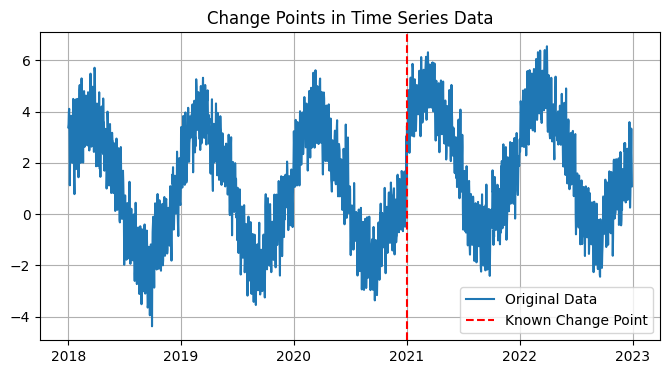

In [ ]:
# Plotting
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(data['ds'], data['y'], label='Original Data')
ax.axvline(x=pd.Timestamp('2021-01-01'), color='r', linestyle='--', label='Known Change Point')
ax.set_title('Change Points in Time Series Data')
ax.legend()
ax.grid(True)
plt.show()



Note: Ensure to check whether `model.model.changepoints_t` provides the correct change points in your version of NeuralProphet, as implementations might change.

### 16.2.9 Plot using plotly backend

In [ ]:
from neuralprophet import NeuralProphet

In [ ]:
import pandas as pd

data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"

df = pd.read_csv(data_location + "wp_log_peyton_manning.csv")
df.head()

ds       y
0  2007-12-10  9.5908
1  2007-12-11  8.5196
2  2007-12-12  8.1837
3  2007-12-13  8.0725
4  2007-12-14  7.8936

In [ ]:
from neuralprophet import NeuralProphet
m = NeuralProphet()
m.set_plotting_backend("plotly-static")  # show plots correctly in jupyter notebooks
metrics = m.fit(df)

Finding best initial lr:   0%|          | 0/237 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

In [ ]:
predicted = m.predict(df)
forecast = m.predict(df)

Predicting: 93it [00:00, ?it/s]

Predicting: 93it [00:00, ?it/s]

In [ ]:
!pip install -U kaleido

In [ ]:
!pip install plotly --upgrade

before executing next cell you must restart runtime

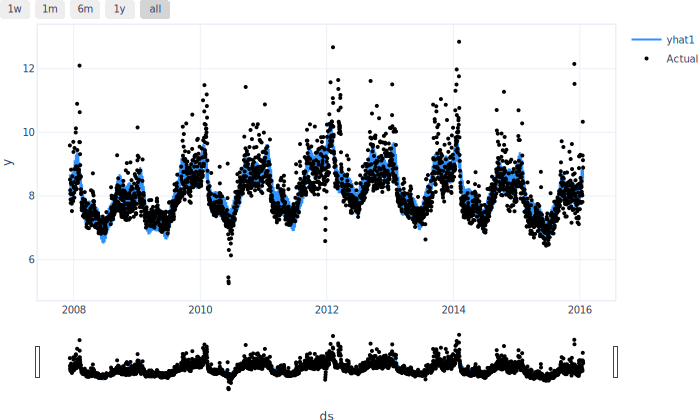

In [ ]:
import kaleido
m.plot(forecast)

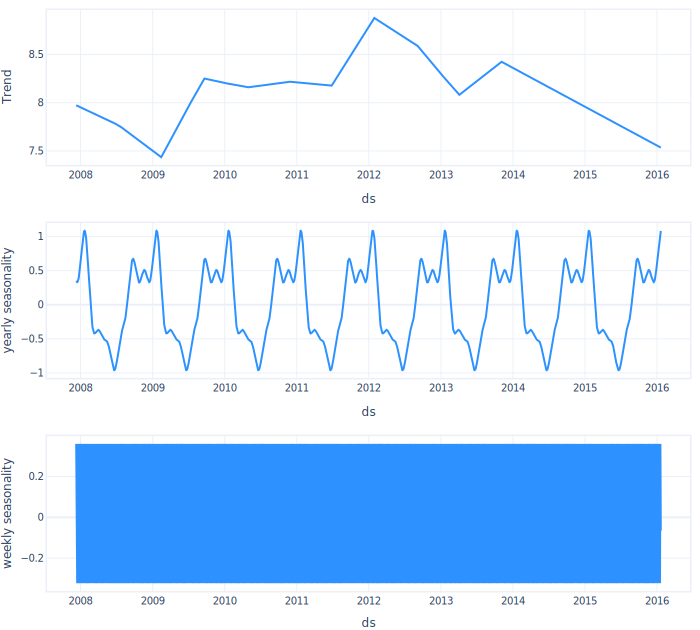

In [ ]:
m.plot_components(forecast)

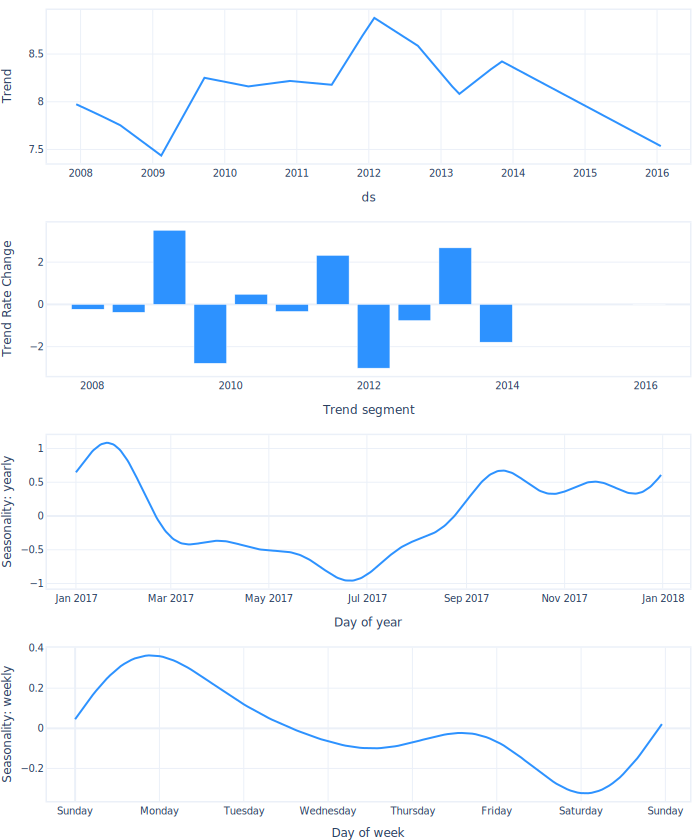

In [ ]:
m.plot_parameters()

In [ ]:
m = NeuralProphet(n_lags=10, quantiles=[0.05, 0.95])
m.set_plotting_backend("plotly-static")
metrics = m.fit(df)
forecast = m.predict(df)

Finding best initial lr:   0%|          | 0/237 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 93it [00:00, ?it/s]

In [ ]:
m.highlight_nth_step_ahead_of_each_forecast(1).plot(forecast)

for more features and examples, please refer to [NP examples](https://neuralprophet.com/how-to-guides/index.html)